In [1]:
#Google Drive

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.  
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhrC7fjgm5TNsEzo6F--IGIzeBB2QpUNexfsP8f_S1_lbnKlQFEZM8
Mounted at /content/drive


In [2]:
import os, cv2, random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from keras.preprocessing import image



Directory changed to specific folder which contains the dataset

In [3]:
os.chdir('/content/drive/MyDrive/Drunk Sober Classify/DeepLearning_Assignment_Drunk_Sober_Classify/')
!ls

 01_petros    13_manos	        25_nausika    37_vassilisA
 02_giorgos   14_lampros        26_tsag       38_christos
 03_vasil     15_konstantinos   27_theox      39_anna
 04_elpis     16_nikos	        28_frag       40_spiliop
 05_artemis   17_kwstas         29_lia	      41_kalp
 06_tris      18_dionisis       30_patty     'Problem Statement.docx'
 07_thanos    19_pasxalis       31_antonis    readme.docx
 08_tzon      20_nefeli         32_vicky      sample_data_read.ipynb
 09_giorg     21_ilias	        33_iliasv     VIMAL.doc
 10_konst     22_dimitris       34_alkis
 11_takis     23_vassiliskar    35_thanasis
 12_loukas    24_rig	        36_krod


In [34]:
folders = [f for f in os.listdir(os.getcwd()) if os.path.isdir(f)]
print('no. of folders:', len(folders))

no. of folders: 41


**VGG16 models are loaded for feature extraction**

In [35]:
from keras.applications.vgg16 import VGG16
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Reshape, Dropout
from keras.applications.vgg16 import preprocess_input
vgg_model = VGG16(weights='imagenet', include_top=True)
for layer in vgg_model.layers[:]:
  layer.trainable = False
#add fully connected layer which have 1024 neuron to vgg16 model
output = vgg_model.get_layer('fc2').output
output = Flatten (name='new_flatten')(output)
output = Dense(units = 1024, activation='relu',name='new_fc')(output)
#output = Dense(units=2, activation ='softmax')(output)
vgg_model =Model(vgg_model.input, output)

#make last 4 layers trainable if lastFourTrainabel ==True
#if lastFourTrainabel ==True
vgg_model.get_layer('block5_conv3').trainable = True
vgg_model.get_layer('fc1').trainable = True
vgg_model.get_layer('fc2').trainable = True
vgg_model.get_layer('new_fc').trainable = True

vgg_model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
vgg_model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

**ResNet50 model is loaded for feature extraction**

In [51]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.layers import Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Reshape, Dropout
resnet_model = ResNet50(weights="imagenet", include_top=True)
#le = None
for layer in resnet_model.layers[:]:
  layer.trainable = False
#add fully connected layer which have 1024 neuron to resnet model
output = resnet_model.get_layer('avg_pool').output
#output = GlobalAveragePooling2D()(output)
output = Flatten (name='new_flatten')(output)
output = Dense(units = 1024, activation='relu',name='new_fc')(output)
#output = Dense(units=2, activation ='softmax')(output)
resnet_model =Model(resnet_model.input, output)

#make last 4 layers trainable if lastFourTrainabel ==True
#if lastFourTrainabel ==True
resnet_model.get_layer('conv5_block3_2_bn').trainable = True
resnet_model.get_layer('conv5_block3_3_conv').trainable = True
resnet_model.get_layer('conv5_block3_3_bn').trainable = True
resnet_model.get_layer('new_fc').trainable = True

resnet_model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])
resnet_model.summary()

#features = model.predict(batchImages, batch_size=config.BATCH_SIZE)
#features = features.reshape((features.shape[0], 7 * 7 * 2048))

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_16[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

Predicts the feature using vgg16 model

In [37]:
def vgg_feature_ext(img_data):
  vgg16_feature = vgg_model.predict(img_data)
  

  return vgg16_feature

Predicts the feature using Resnet50 model

In [52]:
def resnet_feature_ext(img_data):
  resnet_feature = resnet_model.predict(img_data)

  return resnet_feature

Feature Extraction on images 

In [54]:
from sklearn import preprocessing
vgg_features_list = []
resnet_features_list = []
output_list=[]
for f in folders:
  image_files = os.listdir(os.path.join(os.getcwd(),f))
  for i in image_files:
    img = cv2.imread(os.path.join(f, i), cv2.IMREAD_UNCHANGED)
    #print("size of imaage is",img.shape)
    resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    #print("resized imaage size ",resized.shape)
    backtorgb = cv2.cvtColor(resized,cv2.COLOR_GRAY2RGB)
    img_data = image.img_to_array(backtorgb)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    
    vgg_features = vgg_feature_ext(img_data)
    vgg_features_np = np.array(vgg_features)
    
    
    vgg_scaler = preprocessing.StandardScaler().fit(vgg_features_np)
    vgg_scaler.transform(vgg_features_np)
    vgg_final = vgg_features_np.flatten()
    vgg_features_list.append(vgg_final)

    resnet_features = resnet_feature_ext(img_data)
    resnet_features_np = np.array(resnet_features)
    resnet_scaler = preprocessing.StandardScaler().fit(resnet_features_np)
    resnet_scaler.transform(resnet_features_np)
    resnet_final = resnet_features_np.flatten()
    resnet_features_list.append(resnet_final)
    
    x= i.split("_")
    #print(x[2])
    if int(x[2]) == 1:
      output_list.append(0)
      # 0 means sober     
      #print("added")
    #elif int(x[2]) == 2:
      #output_list.append(2)
    #elif int(x[2]) == 3:
      #output_list.append(3)
    else:
      output_list.append(1)
      #1 means drunk
output_list_np = np.array(output_list)
print(output_list_np.shape)

vgg_features_list_np = np.array(vgg_features_list)
resnet_features_list_np = np.array(resnet_features_list)
print("shape of vgg_features")
print(vgg_features_list_np.shape)
print("shape of resnet_features")
print(resnet_features_list_np.shape)
   

(649,)
shape of vgg_features
(649, 1024)
shape of resnet_features
(649, 1024)


In [55]:
vgg_newf = vgg_features_list_np.copy()
resnet_newf = resnet_features_list_np.copy()
newo = output_list_np.copy()

**Training Models**

In [56]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve,StratifiedKFold
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn import tree

**Logistic Regression**


In [66]:
def logistic_regression(X_train, X_test, y_train, y_test):
  clf1 = LogisticRegression(max_iter=2000).fit(X_train, y_train)
  print("training accuracy")
  print(clf1.score(X_train, y_train))
  print("Testing accuracy")
  print(clf1.score(X_test, y_test))

  y_pred2=clf1.predict(X_test)

  target_names = ['Sober', 'Drunk']
  print(classification_report(y_test, y_pred2, target_names=target_names))
  print('ROC-AUC:',round(roc_auc_score(y_test,y_pred2),4))
  # Confusion Matrix

  cm = confusion_matrix(y_test, y_pred2).T
  cm = cm.astype('float')/cm.sum(axis=0)
  ax = sns.heatmap(cm, annot=True, cmap='Blues');
  ax.set_xlabel('True Label',size=12)
  ax.set_ylabel('Predicted Label',size=12)

**MLP Classifier**

In [58]:
def MLP_Classifier(X_train, X_test, y_train, y_test):
  clf = MLPClassifier(random_state=1, max_iter=4000).fit(X_train, y_train)
  #clf.predict(X_test)
  y_pred=clf.predict(X_test)

  print("training accuracy")
  print(clf.score(X_train, y_train))
  print("Testing accuracy")
  print(clf.score(X_test, y_test))

  target_names = ['Sober', 'Drunk']
  print(classification_report(y_test, y_pred, target_names=target_names))
  print('ROC-AUC:',round(roc_auc_score(y_test,y_pred),4))
  # Confusion Matrix

  cm = confusion_matrix(y_test, y_pred).T
  cm = cm.astype('float')/cm.sum(axis=0)
  ax = sns.heatmap(cm, annot=True, cmap='Blues');
  ax.set_xlabel('True Label',size=12)
  ax.set_ylabel('Predicted Label',size=12)

**Decision Tree**

In [59]:
def Decision_Tree(X_train, X_test, y_train, y_test):
  
  model = tree.DecisionTreeClassifier()
  model.fit(X_train, y_train)
  print("training accuracy")
  print(model.score(X_train, y_train))
  print("Testing accuracy")
  print(model.score(X_test, y_test))

  y_pred1= model.predict(X_test)

  target_names = ['Sober', 'Drunk']
  print(classification_report(y_test, y_pred1, target_names=target_names))
  print('ROC-AUC:',round(roc_auc_score(y_test,y_pred1),4))
  # Confusion Matrix
 
  cm = confusion_matrix(y_test, y_pred1).T
  cm = cm.astype('float')/cm.sum(axis=0)
  ax = sns.heatmap(cm, annot=True, cmap='Blues');
  ax.set_xlabel('True Label',size=12)
  ax.set_ylabel('Predicted Label',size=12)


# Model using VGG features 


 Logistic regression Results
training accuracy
0.9942196531791907
Testing accuracy
0.6692307692307692
              precision    recall  f1-score   support

       Sober       0.31      0.24      0.27        33
       Drunk       0.76      0.81      0.79        97

    accuracy                           0.67       130
   macro avg       0.53      0.53      0.53       130
weighted avg       0.64      0.67      0.66       130

ROC-AUC: 0.5284


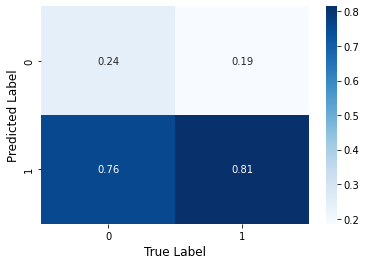

In [67]:
#training and testing data split
X_train, X_test, y_train, y_test = train_test_split(vgg_newf, newo, test_size=0.2, stratify=newo,random_state=42)
print("\n Logistic regression Results")
logistic_regression(X_train, X_test, y_train, y_test)




 Multi Layer Perceptron Classifier
training accuracy
0.9518304431599229
Testing accuracy
0.7461538461538462
              precision    recall  f1-score   support

       Sober       0.50      0.21      0.30        33
       Drunk       0.78      0.93      0.85        97

    accuracy                           0.75       130
   macro avg       0.64      0.57      0.57       130
weighted avg       0.71      0.75      0.71       130

ROC-AUC: 0.57


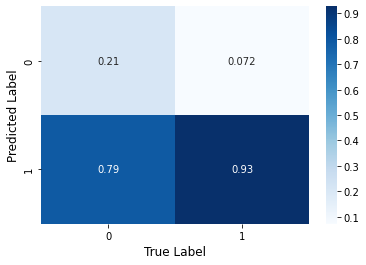

In [61]:
print("\n Multi Layer Perceptron Classifier")
MLP_Classifier(X_train, X_test, y_train, y_test)



 Decision Tree Classifier
training accuracy
1.0
Testing accuracy
0.6538461538461539
              precision    recall  f1-score   support

       Sober       0.31      0.30      0.31        33
       Drunk       0.77      0.77      0.77        97

    accuracy                           0.65       130
   macro avg       0.54      0.54      0.54       130
weighted avg       0.65      0.65      0.65       130

ROC-AUC: 0.5381


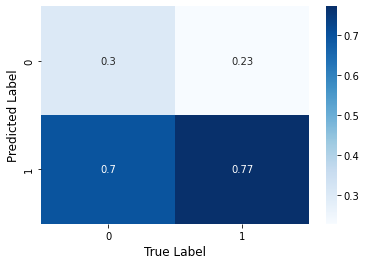

In [62]:

print("\n Decision Tree Classifier")
Decision_Tree(X_train, X_test, y_train, y_test)

# Model using Resnet Feature


 Logistic regression Results
training accuracy
0.9826589595375722
Testing accuracy
0.7692307692307693
              precision    recall  f1-score   support

       Sober       0.60      0.27      0.37        33
       Drunk       0.79      0.94      0.86        97

    accuracy                           0.77       130
   macro avg       0.70      0.61      0.62       130
weighted avg       0.74      0.77      0.74       130

ROC-AUC: 0.6054


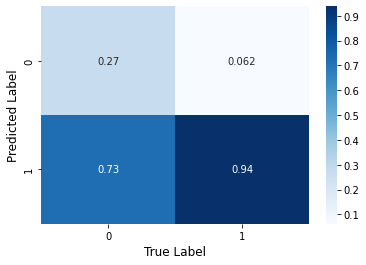

In [68]:
#training and testing data split
X_train, X_test, y_train, y_test = train_test_split(resnet_newf, newo, test_size=0.2, stratify=newo,random_state=42)
print("\n Logistic regression Results")
logistic_regression(X_train, X_test, y_train, y_test)




 Multi Layer Perceptron Classifier
training accuracy
0.838150289017341
Testing accuracy
0.7769230769230769
              precision    recall  f1-score   support

       Sober       1.00      0.12      0.22        33
       Drunk       0.77      1.00      0.87        97

    accuracy                           0.78       130
   macro avg       0.88      0.56      0.54       130
weighted avg       0.83      0.78      0.70       130

ROC-AUC: 0.5606


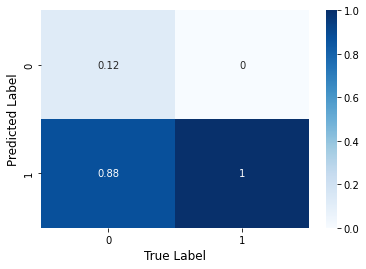

In [64]:
print("\n Multi Layer Perceptron Classifier")
MLP_Classifier(X_train, X_test, y_train, y_test)



 Decision Tree Classifier
training accuracy
1.0
Testing accuracy
0.676923076923077
              precision    recall  f1-score   support

       Sober       0.34      0.30      0.32        33
       Drunk       0.77      0.80      0.79        97

    accuracy                           0.68       130
   macro avg       0.56      0.55      0.56       130
weighted avg       0.66      0.68      0.67       130

ROC-AUC: 0.5536


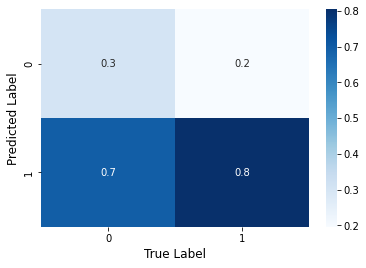

In [65]:

print("\n Decision Tree Classifier")
Decision_Tree(X_train, X_test, y_train, y_test)

# **Version 2**

**Feature Extraction without hand images**

In [69]:
vgg_features_list = []
resnet_features_list = []
output_list=[]
for f in folders:
  image_files = os.listdir(os.path.join(os.getcwd(),f))
  for i in image_files:
    x= i.split("_")
    if x[3]=='h':
      pass
    else:
      img = cv2.imread(os.path.join(f, i), cv2.IMREAD_UNCHANGED)
      #print("size of imaage is",img.shape)
      resized = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
      #print("resized imaage size ",resized.shape)
      backtorgb = cv2.cvtColor(resized,cv2.COLOR_GRAY2RGB)
      img_data = image.img_to_array(backtorgb)
      img_data = np.expand_dims(img_data, axis=0)
      img_data = preprocess_input(img_data)
      
      vgg_features = vgg_feature_ext(img_data)
      vgg_features_np = np.array(vgg_features)
      
      
      vgg_scaler = preprocessing.StandardScaler().fit(vgg_features_np)
      vgg_scaler.transform(vgg_features_np)
      vgg_final = vgg_features_np.flatten()
      vgg_features_list.append(vgg_final)

      resnet_features = resnet_feature_ext(img_data)
      resnet_features_np = np.array(resnet_features)
      resnet_scaler = preprocessing.StandardScaler().fit(resnet_features_np)
      resnet_scaler.transform(resnet_features_np)
      resnet_final = resnet_features_np.flatten()
      resnet_features_list.append(resnet_final)
      
      x= i.split("_")
      #print(x[2])
      if int(x[2]) == 1:
        output_list.append(0)
        # 0 means sober     
        #print("added")
      #elif int(x[2]) == 2:
        #output_list.append(2)
      #elif int(x[2]) == 3:
        #output_list.append(3)
      else:
        output_list.append(1)
        #1 means drunk

output_list_np = np.array(output_list)
print(output_list_np.shape)

vgg_features_list_np = np.array(vgg_features_list)
resnet_features_list_np = np.array(resnet_features_list)
print("shape of vgg_features")
print(vgg_features_list_np.shape)
print("shape of resnet_features")
print(resnet_features_list_np.shape)
   

(487,)
shape of vgg_features
(487, 1024)
shape of resnet_features
(487, 1024)


In [70]:
vgg_newf = vgg_features_list_np.copy()
resnet_newf = resnet_features_list_np.copy()
newo = output_list_np.copy()

**Model using VGG feature and without hand images**


 Logistic regression Results
training accuracy
0.9974293059125964
Testing accuracy
0.6020408163265306
              precision    recall  f1-score   support

       Sober       0.21      0.20      0.20        25
       Drunk       0.73      0.74      0.73        73

    accuracy                           0.60        98
   macro avg       0.47      0.47      0.47        98
weighted avg       0.60      0.60      0.60        98

ROC-AUC: 0.4699


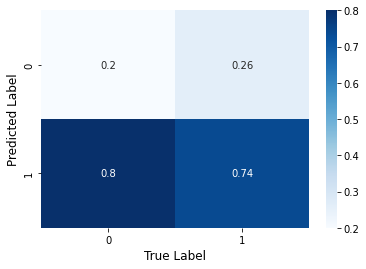

In [71]:
#training and testing data split
X_train, X_test, y_train, y_test = train_test_split(vgg_newf, newo, test_size=0.2, stratify=newo,random_state=42)
print("\n Logistic regression Results")
logistic_regression(X_train, X_test, y_train, y_test)




 Multi Layer Perceptron Classifier
training accuracy
0.9768637532133676
Testing accuracy
0.6224489795918368
              precision    recall  f1-score   support

       Sober       0.12      0.08      0.10        25
       Drunk       0.72      0.81      0.76        73

    accuracy                           0.62        98
   macro avg       0.42      0.44      0.43        98
weighted avg       0.57      0.62      0.59        98

ROC-AUC: 0.4441


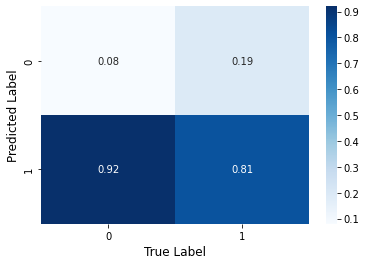

In [72]:
print("\n Multi Layer Perceptron Classifier")
MLP_Classifier(X_train, X_test, y_train, y_test)



 Decision Tree Classifier
training accuracy
1.0
Testing accuracy
0.5510204081632653
              precision    recall  f1-score   support

       Sober       0.12      0.12      0.12        25
       Drunk       0.70      0.70      0.70        73

    accuracy                           0.55        98
   macro avg       0.41      0.41      0.41        98
weighted avg       0.55      0.55      0.55        98

ROC-AUC: 0.4093


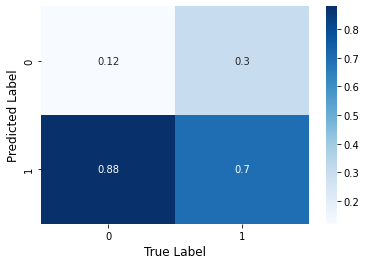

In [73]:

print("\n Decision Tree Classifier")
Decision_Tree(X_train, X_test, y_train, y_test)

**Model using Resnet feature and without hand images**


 Logistic regression Results
training accuracy
0.987146529562982
Testing accuracy
0.6938775510204082
              precision    recall  f1-score   support

       Sober       0.41      0.48      0.44        25
       Drunk       0.81      0.77      0.79        73

    accuracy                           0.69        98
   macro avg       0.61      0.62      0.62        98
weighted avg       0.71      0.69      0.70        98

ROC-AUC: 0.6236


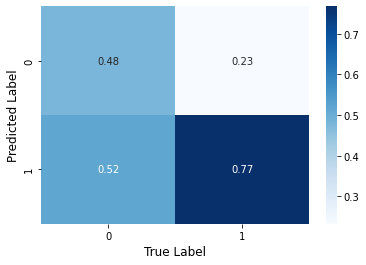

In [74]:
#training and testing data split
X_train, X_test, y_train, y_test = train_test_split(resnet_newf, newo, test_size=0.2, stratify=newo,random_state=42)
print("\n Logistic regression Results")
logistic_regression(X_train, X_test, y_train, y_test)




 Multi Layer Perceptron Classifier
training accuracy
0.794344473007712
Testing accuracy
0.7346938775510204
              precision    recall  f1-score   support

       Sober       0.33      0.04      0.07        25
       Drunk       0.75      0.97      0.85        73

    accuracy                           0.73        98
   macro avg       0.54      0.51      0.46        98
weighted avg       0.64      0.73      0.65        98

ROC-AUC: 0.5063


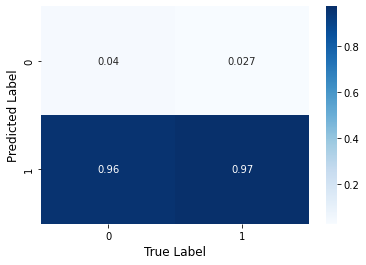

In [75]:
print("\n Multi Layer Perceptron Classifier")
MLP_Classifier(X_train, X_test, y_train, y_test)




 Decision Tree Classifier
training accuracy
1.0
Testing accuracy
0.5816326530612245
              precision    recall  f1-score   support

       Sober       0.21      0.24      0.23        25
       Drunk       0.73      0.70      0.71        73

    accuracy                           0.58        98
   macro avg       0.47      0.47      0.47        98
weighted avg       0.60      0.58      0.59        98

ROC-AUC: 0.4693


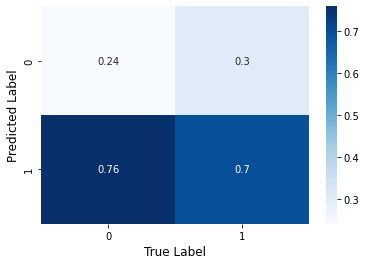

In [76]:
print("\n Decision Tree Classifier")
Decision_Tree(X_train, X_test, y_train, y_test)